###This notebook contains some usual analysis for LPA
It only works for output format in pdb.

In [32]:
import numpy as np
import pylab as plt
from lpa_pdb_diagnostics import *
from scipy.constants import e, c, m_e, epsilon_0
import os
import matplotlib
%matplotlib inline

Setting the directory path where the data are located:

In [33]:
dir_path = os.getcwd() + "/data/"

Setting the path for the results:

In [34]:
res_path = config.result_path

#Laser - Plasma Parameters
Here we define some of the laser plasma parameters.

In [35]:
# Some definitions of the laser plasma parameters
lambda0 = 0.8e-6
w0 = 2*np.pi*c/lambda0
laser_waist = 17e-6
plasma_dens = 4e24
plasma_length = 4.5e-3
wp = np.sqrt(plasma_dens * e**2/ (epsilon_0 * m_e))
lambda_plasma = 2*np.pi*c/wp

#Numerical Parameters
Here we define the necessary numerical parameters for the analysis

In [36]:
zmax = 2*lambda0
zmin = zmax - 4*lambda_plasma
nzplambda = 20
w_size = zmax - zmin
Nz = int(w_size*nzplambda/lambda0)
dz = w_size/Nz

#Generate values for file reading

In [37]:
inf = 0
sup = 0
period_int = 1000
period_ext = 1000
val = values( inf, sup, period_int, period_ext, plasma_length/dz )
longitudinal_position = val*dz

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


We create an array of file names that we analyze.

In [38]:
field = np.empty(len(val),dtype="S100")
N5 = np.empty(len(val),dtype="S100")
N6 = np.empty(len(val),dtype="S100")
N7 = np.empty(len(val),dtype="S100")
H = np.empty(len(val),dtype="S100")

# Initialize file names
for i, v in enumerate(val):
    field[i] = dir_path + "fields%06d.pdb" %v
    N5[i] = dir_path + "N5%06d.pdb" %v
    N6[i] = dir_path + "N6%06d.pdb" %v
    N7[i] = dir_path + "N7%06d.pdb" %v
    H[i] = dir_path + "H%06d.pdb" %v

#Reading files

We can either read a single file, or we can read a number of files using a loop.

##Single file reading

Example Case: Evaluation of laser c$\tau$ at one given instant
The instant that I would like to investigate is at $1.5mm$.

In [39]:
it_instant = int(4.5e-3/dz/period_int) #round off to the nearest 1000
f = FieldInstant(field[it_instant], np.pi/2, quantities= ["E", "zfield"])

** Processing ** Fields: Intialisation of /Volumes/Orsay/gilles_Nitrogen0.01/data/fields113000.pdb **


####Zero crossing analysis
Returns the bucket positions, can be used in particle selection.

In [40]:
buckets = f.wakefield_zero_crossing()

###Fields analysis

####2D laser field
A 2D field laser plot using matplotlib

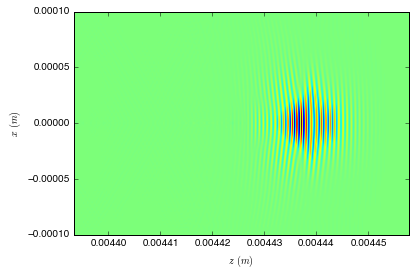

In [41]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
plt.imshow(f.laser_field, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####1D laser field

(4393.3438021486654, 4457.6588750582596)

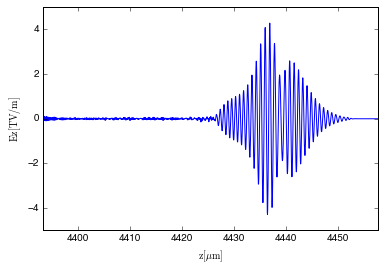

In [42]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.laser_field[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
axarr.set_xlim( min(np.array(f.zfield)*1e6), max(np.array(f.zfield)*1e6))

####Laser c$\tau$

In [43]:
f.laser_ctau()

1.5626428993721097e-05

####Laser envelop

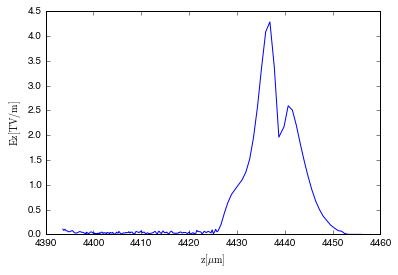

In [44]:
z, env = f.laser_envelop()
#Plotting
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(z)*1e6, np.array(env)*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
#axarr.set_xlim( min(np.array(z)*1e6), max(np.array(z)*1e6))

####2D wakefield

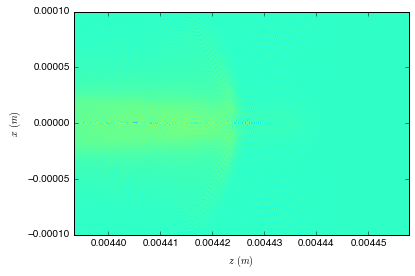

In [45]:
fig.patch.set_facecolor('white')
plt.imshow(f.ez, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####2D transverse field

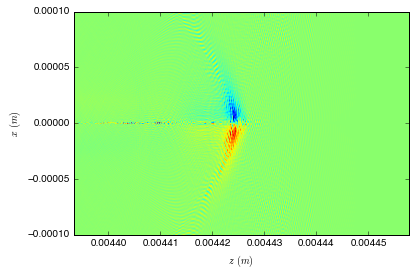

In [46]:
fig.patch.set_facecolor('white')
plt.imshow(f.ex, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####Superposition of 1D wakefield and transverse field

(4393.3438021486654, 4457.6588750582596)

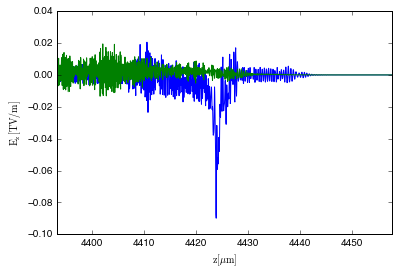

In [47]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.ex[int(f.shape[0]/2)-9,:])*1e-12 )
axarr.plot( np.array(f.zfield)*1e6, np.array(f.ez[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{E_z[TV/m]}$")
axarr.set_xlim( min(np.array(f.zfield)*1e6), max(np.array(f.zfield)*1e6))

###Particle analysis

####Beam spectrum
Instantiate partilcle objects

In [48]:
HH = ParticleInstant(H[it_instant], quantities = ["PID", "Weight", "Position", "Momentum"])
N66 = ParticleInstant(N6[it_instant])
N77 = ParticleInstant(N7[it_instant])
qdict = HH.get_qdict() ###qdict is normally the same for all particle quantities

** Processing ** Particles: Initialisation of /Volumes/Orsay/gilles_Nitrogen0.01/data/H113000.pdb **
** Processing ** Particles: Initialisation of /Volumes/Orsay/gilles_Nitrogen0.01/data/N6113000.pdb **
** Processing ** Particles: Initialisation of /Volumes/Orsay/gilles_Nitrogen0.01/data/N7113000.pdb **


We choose particles here, two parameters of choice are offered: gamma_threshold and region of interest.

In [73]:
# we choose particles which have a gamma threshold between 40 to 400 
# and situated in the first accelerating bucket 
cPH = HH.select( gamma_threshold = [400,800] )
cPN6 = N66.select( gamma_threshold = [400,800] )
cPN7 = N77.select( gamma_threshold = [400,800] )


Group all the particles before doing beam spectrum analysis. There are two ways to group particles and they are manifested using "keep_object_name" variable. If it's true, the information on the origin of these particles, ie the species of the particles is kept; otherwise, all the species' particle quantities will be merged.

In [74]:
ck_all_particles = quant_concatenate([cPN6,cPN7], keep_object_name= True) #keeping the information on the species
c_all_particles = quant_concatenate([cPN6,cPN7])

A file named beam_spectrum_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.


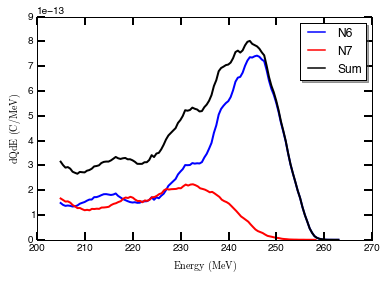

In [75]:
energy, dQdE = beam_spectrum(val[it_instant], 
                             ck_all_particles[qdict["gamma"]], 
                             ck_all_particles[qdict["w"]], lwrite=True,
                             leg=["N6","N7","Sum"])

####Beam peak evaluation and beam energy spread
We use the total energy spectrum to evaluate these properties.

In [76]:
# Check if the input arrays are valid
if np.isnan(energy[-1].all()) and np.isnan(dQdE[-1].all()):
    print "The spectrum is invalid"

else:
    t_energy = energy[-1]
    t_dQdE = dQdE[-1]
    Ipeak, Epeak, Cpeak = beam_peak( t_energy, t_dQdE)
    print "Peaks are situated at:"
    print "Index : %d" %Ipeak[-1]
    print "Energy: %f" %Epeak[-1]
    print "Charge: %f" %Cpeak[-1]
    peak = (Ipeak[-1], Epeak[-1], Cpeak[-1])
    deltaE , deltaEE = beam_energy_spread( t_energy, t_dQdE, peak = peak)
    print "Delta E: %f MeV, Delta E/E: %f" %(deltaE, deltaEE)

Peaks are situated at:
Index : 83
Energy: 246.457739
Charge: 0.000000
Delta E: 25.618127 MeV, Delta E/E: 0.103945


####Beam statistics
Here we present the average and standard deviation of beam transverse positions, and momenta. The analysis here takes into account all trapped electrons, regardless the species

#####Beam transverse positions
Taking into account all trapped electrons, regardless the species

In [77]:
avg_x = wavg( c_all_particles[qdict["x"]] ,c_all_particles[qdict["w"]] )
avg_y = wavg( c_all_particles[qdict["y"]] ,c_all_particles[qdict["w"]] )
print u"<x>: %f \u03BCm" %( 1e6*avg_x )
print u"<y>: %f \u03BCm" %( 1e6*avg_y )
std_x = wstd( c_all_particles[qdict["x"]] ,c_all_particles[qdict["w"]] )
std_y = wstd( c_all_particles[qdict["y"]] ,c_all_particles[qdict["w"]] )
print u"\u03c3x: %f \u03BCm" %( 1e6*std_x )
print u"\u03c3y: %f \u03BCm" %( 1e6*std_y )

<x>: -0.515161 μm
<y>: -0.457815 μm
σx: 4.572947 μm
σy: 4.879905 μm


#####Beam transverse momenta
Taking into account all trapped electrons, regardless the species

In [78]:
avg_px = wavg( c_all_particles[qdict["ux"]] ,c_all_particles[qdict["w"]] )
avg_py = wavg( c_all_particles[qdict["uy"]] ,c_all_particles[qdict["w"]] )
print u"<px>: %f m_e*c" %(avg_px)
print u"<py>: %f m_e*c" %(avg_py)
std_px = wstd( c_all_particles[qdict["ux"]] ,c_all_particles[qdict["w"]] )
std_py = wstd( c_all_particles[qdict["uy"]] ,c_all_particles[qdict["w"]] )
print u"\u03c3px: %f m_e*c" %(std_px)
print u"\u03c3py: %f m_e*c" %(std_py)

<px>: -0.334233 m_e*c
<py>: -0.179172 m_e*c
σpx: 3.201425 m_e*c
σpy: 3.668433 m_e*c


####Beam emittance

In transverse directions

A file named Histogram_emittance_x_all_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
A file named Histogram_emittance_y_all_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
Emittance in x-direction: 7.347221 mm.mrad
Emittance in y-direction: 9.071518 mm.mrad


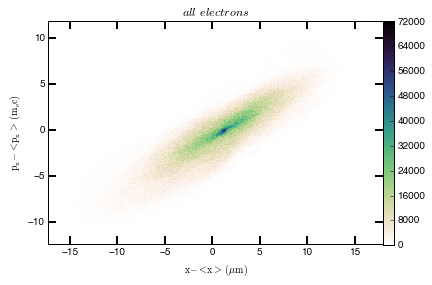

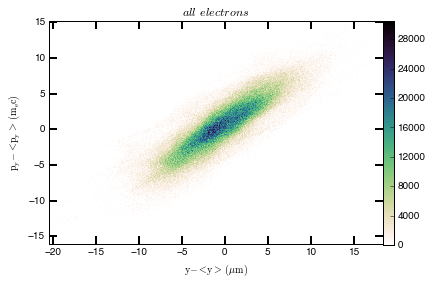

In [79]:
emitx = beam_emittance( val[it_instant],  c_all_particles, qdict, "x", 
                       histogram= True, lplot=True, lsavefig=True, lwrite=True ) 
emity = beam_emittance( val[it_instant],  c_all_particles, qdict, "y", 
                       histogram= True, lplot=True, lsavefig=True, lwrite=True )
print "Emittance in x-direction: %f mm.mrad" %(emitx*1e6)
print "Emittance in y-direction: %f mm.mrad" %(emity*1e6)

Decomposition by species

A file named Histogram_emittance_x_N6_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
A file named Histogram_emittance_y_N6_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
N6: Emittance in x-direction: 7.227656 mm.mrad
N6: Emittance in y-direction: 9.021801 mm.mrad
A file named Histogram_emittance_x_N7_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
A file named Histogram_emittance_y_N7_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
N7: Emittance in x-direction: 7.622480 mm.mrad
N7: Emittance in y-direction: 9.153561 mm.mrad


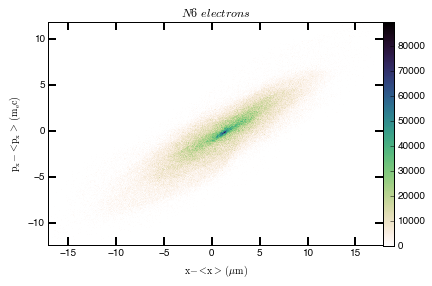

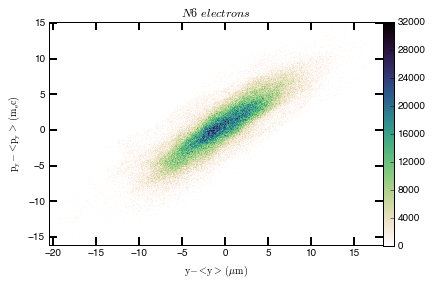

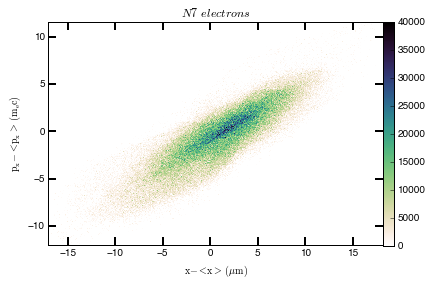

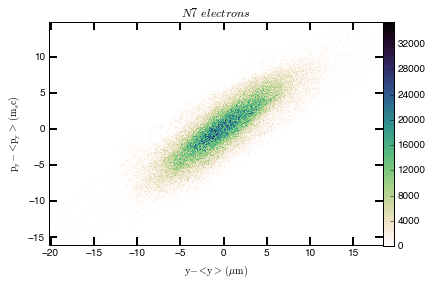

In [80]:
species = ["N6", "N7"]
emitx_sp = []
emity_sp = []


if np.array(ck_all_particles).size!=0:
    # Transpose the matrix for reading only if there are data in ck_all_particles
    transpose_ck_all_particles = np.transpose(ck_all_particles)

    for index, sp_name in enumerate(species):
        emitx_sp.append( beam_emittance( val[it_instant], transpose_ck_all_particles[index], qdict, "x", 
                        species = sp_name, histogram= True, lplot=True, lsavefig=True, lwrite=True ) )
        emity_sp.append( beam_emittance( val[it_instant], transpose_ck_all_particles[index], qdict, "y", 
                        species = sp_name, histogram= True, lplot=True, lsavefig=True, lwrite=True ) )
        print "%s: Emittance in x-direction: %f mm.mrad" %(sp_name, emitx_sp[index]*1e6)
        print "%s: Emittance in y-direction: %f mm.mrad" %(sp_name, emity_sp[index]*1e6)

####Emittance with respect to gamma.

Taking into account all trapped electrons, regardless the species. The following cell conducts an analysis of independent species, and the results are drawn right after.

In [81]:
gamma_all = []
emittance_all = []

gammax, emittancex = sorted_by_gamma_beam_emittance ( val[it_instant], c_all_particles, qdict, "x", lwrite = True )
gammay, emittancey = sorted_by_gamma_beam_emittance ( val[it_instant], c_all_particles, qdict, "y", lwrite = True )

# Appending to an array
gamma_all.append(gammax)
gamma_all.append(gammay)
emittance_all.append(emittancex)
emittance_all.append(emittancey)

Beam emittance: Analysis is not performed because no particles are detected.
A file named sorted_beam_emittance_x_all_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
Beam emittance: Analysis is not performed because no particles are detected.
A file named sorted_beam_emittance_y_all_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.


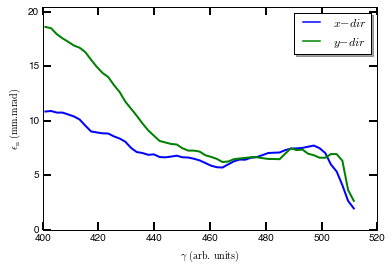

In [82]:
if np.array(ck_all_particles).size!=0:
    # Plotting emittance with respect to gamma
    if 'inline' in matplotlib.get_backend():
        fig, ax = plt.subplots(dpi=150)
    else:
        fig, ax = plt.subplots( figsize=(10,8) )

    fig.patch.set_facecolor('white')
    
    num_dir = 2
    leg = [r"$x-dir$", r"$y-dir$"]
    for i in xrange(num_dir):
        ax.plot(gamma_all[i], emittance_all[i]*1e6, label = leg[i],  linewidth = 2)
    
    ax.set_xlabel(r"$\mathrm{\gamma\,(arb.\,units)}$")
    ax.set_ylabel(r"$\mathrm{\epsilon_{n}\,(mm.mrad)}$")
    ax.set_ylim(0.0, 1.1*max(map(max, emittance_all))*1e6)
    ax.xaxis.set_tick_params(width=2, length = 8)
    ax.yaxis.set_tick_params(width=2, length = 8)
    font = {'family':'sans-serif'}
    plt.rc('font', **font)
    
    if leg is not None:
        # Now add the legend with some customizations.
        legend = plt.legend(loc='best', shadow=True)

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')

        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width

Decomposition by species

In [83]:
gamma_species = []
emittance_species = []

if np.array(ck_all_particles).size!=0:
    for index, sp_name in enumerate(species):
        gammax, emittancex = sorted_by_gamma_beam_emittance ( val[it_instant], 
                                                             list(transpose_ck_all_particles[index]),
                                                             qdict, "x", lwrite = True, species = sp_name )
        gammay, emittancey = sorted_by_gamma_beam_emittance ( val[it_instant], 
                                                             list(transpose_ck_all_particles[index]),
                                                             qdict, "y", lwrite = True, species = sp_name )
        gamma_species.append(gammax)
        gamma_species.append(gammay)
        emittance_species.append(emittancex)
        emittance_species.append(emittancey)

Beam emittance: Analysis is not performed because no particles are detected.
A file named sorted_beam_emittance_x_N6_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
Beam emittance: Analysis is not performed because no particles are detected.
A file named sorted_beam_emittance_y_N6_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
Beam emittance: Analysis is not performed because no particles are detected.
A file named sorted_beam_emittance_x_N7_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
Beam emittance: Analysis is not performed because no particles are detected.
A file named sorted_beam_emittance_y_N7_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.


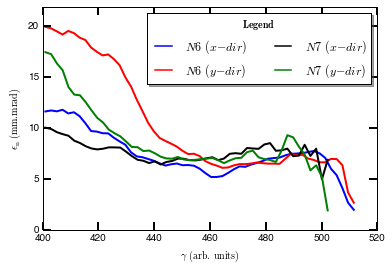

In [84]:
if np.array(ck_all_particles).size!=0:
    # Plotting emittance with respect to gamma
    if 'inline' in matplotlib.get_backend():
        fig, ax = plt.subplots(dpi=150)
    else:
        fig, ax = plt.subplots( figsize=(10,8) )

    fig.patch.set_facecolor('white')
    c = [ "blue", "red", "black", "green", "magenta", "cyan" ]
    leg = [r"$N6\,(x-dir)$", r"$N6\,(y-dir)$", r"$N7\,(x-dir)$",r"$N7\,(y-dir)$"]
    num_species = len(gamma_species)

    for i in xrange( num_species ):

        ax.plot( gamma_species[i], emittance_species[i]*1e6, color = c[i%(num_species + 1)],
                    label = leg[i], linewidth = 2)

    ax.set_xlabel(r"$\mathrm{\gamma\,(arb.\,units)}$")
    ax.set_ylabel(r"$\mathrm{\epsilon_{n}\,(mm.mrad)}$")
    ax.set_ylim(0.0, 1.1*max(map(max, emittance_species))*1e6)
    ax.xaxis.set_tick_params(width=2, length = 8)
    ax.yaxis.set_tick_params(width=2, length = 8)
    font = {'family':'sans-serif'}
    plt.rc('font', **font)

    if leg is not None:
        # Now add the legend with some customizations.
        legend = plt.legend(title = r"$\mathbf{Legend}$", loc='best',
                            ncol=2, shadow=True)

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')

        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width

####Beam divergence

In [85]:
divx  = beam_divergence (c_all_particles, qdict, "x")
divy  = beam_divergence (c_all_particles, qdict, "y")
print "Divergence in x-direction: %f mrad" %(divx*1e3)
print "Divergence in y-direction: %f mrad" %(divy*1e3)

Divergence in x-direction: 7.078899 mrad
Divergence in y-direction: 8.181592 mrad


####Beam total charge

In [86]:
charge = beam_charge(c_all_particles[qdict["w"]])
print "Charge: %f pC" %(charge*1e12) 

Charge: 46.781598 pC


####Phase space plot with fields

A file named Charge_density_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.
A file named Normalized_Fields_113000.hdf5 in /Volumes/Orsay/gilles_Nitrogen0.01/result/ is created.


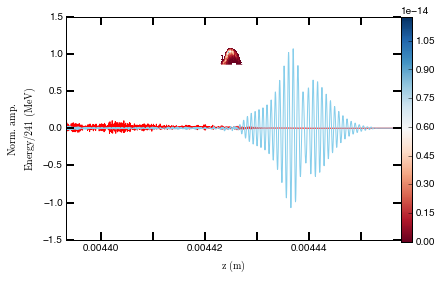

In [87]:
N_laser = f.normalizedField( w0, "laser")
N_wake = f.normalizedField( wp, "wake")

bigPicture( val[it_instant], c_all_particles[qdict["z"]], c_all_particles[qdict["gamma"]],
           c_all_particles[qdict["w"]], f.zfield, N_wake, N_laser, lwrite= True )